In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


### Data Preparation -Phase-

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
DT_bmi_pipe = Pipeline( steps=[ 
                        ('scale',StandardScaler()),
                        ('lr',DecisionTreeRegressor(random_state=42))
                    ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\3092099522.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)


In [5]:
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  0


In [6]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\3288176214.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\3288176214.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\3288176214.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df

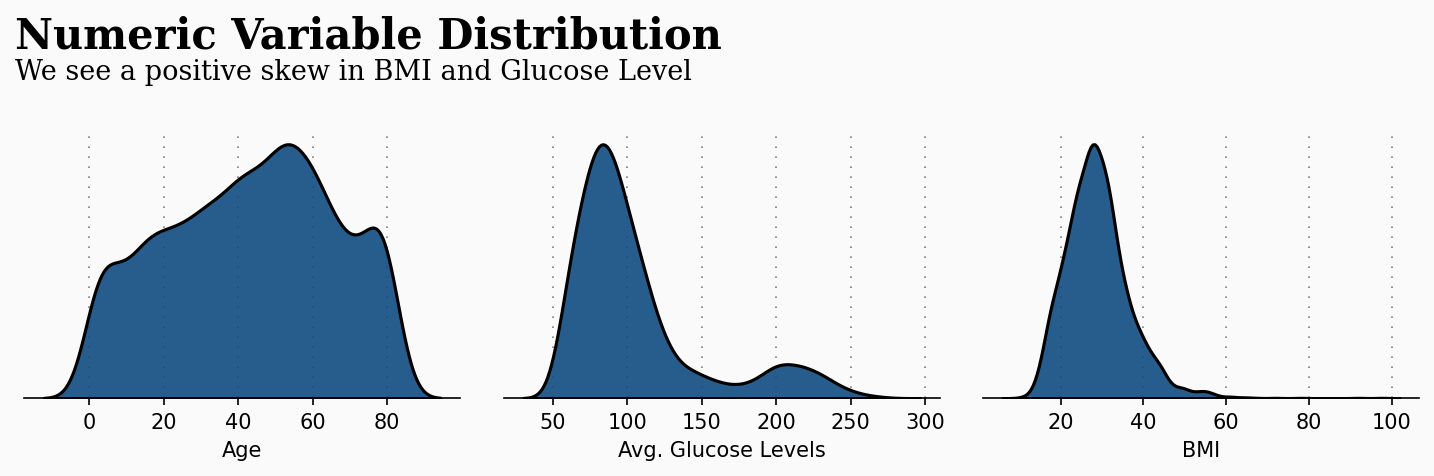

In [7]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(variable) removed this for aesthetics
        plot += 1
        
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.02, 'We see a positive skew in BMI and Glucose Level', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()


C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\3610602098.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\3610602098.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\3610602098.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[feat

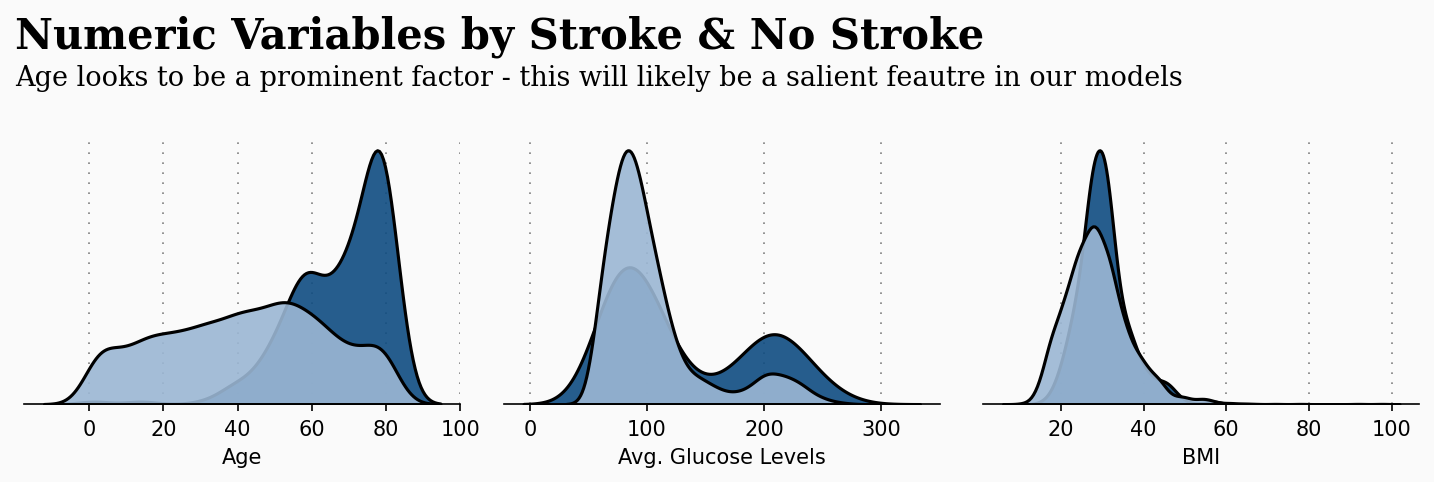

In [8]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age looks to be a prominent factor - this will likely be a salient feautre in our models', 
         fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

### Insight
Based on the above plots, it seems clear that Age is a big factor in stroke patients - the older you get the more at risk you are.

Though less obvious, there are also differences in Avg. Glucose Levels and BMI.

Let's explore those variables further...

In [9]:
str_only = df[df['stroke'] == 1]
no_str_only = df[df['stroke'] == 0]

C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\2594018669.py:12: RuntimeWarning: invalid value encountered in scalar divide
  rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))


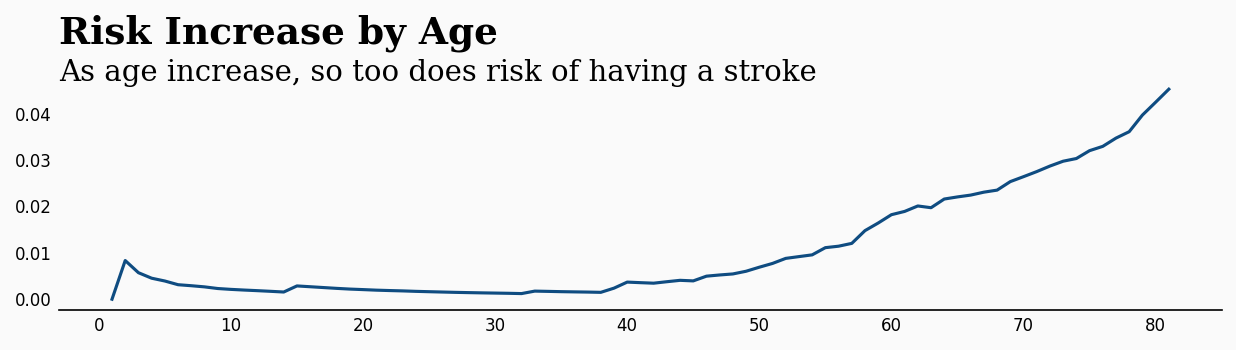

In [10]:
fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(-3,0.055,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-3,0.047,'As age increase, so too does risk of having a stroke',fontsize=14,fontfamily='serif')


plt.show()

This confirms what our intuitions told us. The older you get, the more at risk you get.

However, you may have notices the low risk values on the y-axis. This is because the dataset is highly imbalanced.

Only 249 strokes are in our dataset which totals 5000 - around 1 in 20.

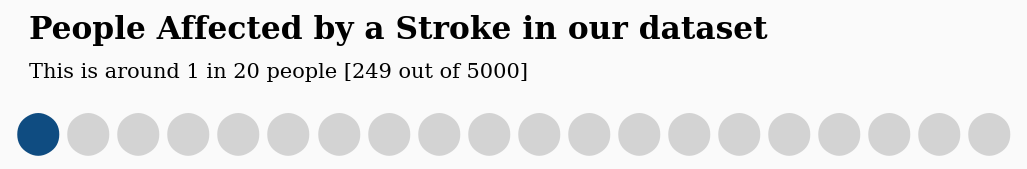

In [11]:
from pywaffle import Waffle

fig = plt.figure(figsize=(7, 2),dpi=150,facecolor=background_color,
    FigureClass=Waffle,
    rows=1,
    values=[1, 19],
    colors=['#0f4c81', "lightgray"],
    characters='⬤',
    font_size=20,vertical=True,
)

fig.text(0.035,0.78,'People Affected by a Stroke in our dataset',fontfamily='serif',fontsize=15,fontweight='bold')
fig.text(0.035,0.65,'This is around 1 in 20 people [249 out of 5000]',fontfamily='serif',fontsize=10)

plt.show()

This needs to be considered when modelling of course, but also when formulating risk.

Strokes are still relatively rare, we are not saying anything is guaranteed, just that risk is increasing.

In [12]:
# Drop single 'Other' gender
no_str_only = no_str_only[(no_str_only['gender'] != 'Other')]

In [13]:
no_str_only.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
67     Female  17.0  0             0              No            Private        Urban           92.97              28.5  formerly smoked  0         1
49196  Female  27.0  0             0              Yes           Private        Urban           127.28             23.4  Unknown          0         1
49179  Male    10.0  0             0              No            children       Rural           84.81              16.8  never smoked     0         1
49152  Female  40.0  0             0              No            Private        Rural           70.45              23.3  smokes           0         1
49120  Female  39.0  0             0              Yes           Govt_job       Rural           69.38              22.1  Unknown          0         1
                                                                                                               

In [14]:
no_str_only['gender'].value_counts()

gender
Female    2853
Male      2007
Name: count, dtype: int64

### General Overview
We've assessed a few variables so far, and gained some powerful insights.

I'll now plot several variables in one place, so we can spot interesting trends or features.

I will split the data in to 'Stroke' and 'No-Stroke' so we can see if these two populations differ in any meaningful way.

In [15]:
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec

### Model preparation - Phase -

In [16]:
for column in df.columns:
    print(f"Column: {column}")
    print("Values and Counts:")
    print(df[column].value_counts())
    print("-" * 40)  # Separator for better readability

Column: id
Values and Counts:
id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64
----------------------------------------
Column: gender
Values and Counts:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
----------------------------------------
Column: age
Values and Counts:
age
78    102
57     95
52     90
54     87
51     86
     ... 
11     36
10     35
4      34
7      32
6      24
Name: count, Length: 83, dtype: int64
----------------------------------------
Column: hypertension
Values and Counts:
hypertension
0    4612
1     498
Name: count, dtype: int64
----------------------------------------
Column: heart_disease
Values and Counts:
heart_disease
0    4834
1     276
Name: count, dtype: int64
----------------------------------------
Column: ever_married
Values and Counts:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
---

In [17]:
for column in df.columns:
    print(f"{df[column].name} => Null values : {df[column].isnull().sum()} || NaN Values : {df[column].isna().sum()}")

id => Null values : 0 || NaN Values : 0
gender => Null values : 0 || NaN Values : 0
age => Null values : 0 || NaN Values : 0
hypertension => Null values : 0 || NaN Values : 0
heart_disease => Null values : 0 || NaN Values : 0
ever_married => Null values : 0 || NaN Values : 0
work_type => Null values : 0 || NaN Values : 0
Residence_type => Null values : 0 || NaN Values : 0
avg_glucose_level => Null values : 0 || NaN Values : 0
bmi => Null values : 0 || NaN Values : 0
smoking_status => Null values : 0 || NaN Values : 0
stroke => Null values : 0 || NaN Values : 0


In [18]:
# Encoding categorical values

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':2}).astype(np.int8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.int8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.int8)

C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\247304754.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':2}).astype(np.int8)
C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\247304754.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.int8)
C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\247304754.py:5: FutureWarning: Downcasting behavior in `replace` is 

In [19]:
for column in df.columns:
        print(f"Column: {column}")
        print("Values and Counts:")
        print(df[column].value_counts())
        print("-" * 40)  # Separator for better readability

Column: id
Values and Counts:
id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64
----------------------------------------
Column: gender
Values and Counts:
gender
1    2994
0    2115
2       1
Name: count, dtype: int64
----------------------------------------
Column: age
Values and Counts:
age
78    102
57     95
52     90
54     87
51     86
     ... 
11     36
10     35
4      34
7      32
6      24
Name: count, Length: 83, dtype: int64
----------------------------------------
Column: hypertension
Values and Counts:
hypertension
0    4612
1     498
Name: count, dtype: int64
----------------------------------------
Column: heart_disease
Values and Counts:
heart_disease
0    4834
1     276
Name: count, dtype: int64
----------------------------------------
Column: ever_married
Values and Counts:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
------------------

In [20]:
# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',249/(249+4861))
print('Null Accuracy: ',4861/(4861+249))

Inverse of Null Accuracy:  0.0487279843444227
Null Accuracy:  0.9512720156555773


## Used Columns for input : 
'gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi'

## Input Data Types : 

In [21]:
df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']].dtypes

gender                  int8
age                    int32
hypertension           int64
heart_disease          int64
work_type               int8
avg_glucose_level    float64
bmi                  float64
dtype: object

## all potential values for each input column :


In [27]:
df[['avg_glucose_level','bmi']].value_counts()

avg_glucose_level  bmi 
89.68              38.7    2
96.84              30.2    2
67.92              31.1    2
81.59              27.2    2
57.56              27.5    2
                          ..
82.07              30.4    1
                   29.0    1
82.06              35.2    1
82.05              21.0    1
271.74             31.1    1
Name: count, Length: 5105, dtype: int64

In [28]:
df[['gender','age','hypertension','heart_disease','work_type']].value_counts()

gender  age  hypertension  heart_disease  work_type
1       23   0             0              0            42
        1    0             0              3            42
        45   0             0              0            41
        40   0             0              0            37
        32   0             0              0            37
                                                       ..
        36   1             0              0             1
        35   1             0              0             1
0       46   0             1              0             1
                                          2             1
2       26   0             0              0             1
Name: count, Length: 819, dtype: int64

In [31]:
df['work_type'].value_counts()

work_type
0    2925
1     819
3     687
2     657
4      22
Name: count, dtype: int64

## Remember ! :
# Encoding categorical values

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':2}).astype(np.int8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.int8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.int8)

In [32]:
X  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = df['stroke']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [33]:
X_test.head(2)

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
4688,0,31,0,0,1,64.85,23.0
4478,0,40,0,0,1,65.29,28.3


In [34]:
# Our data is biased, we can fix this with SMOTE

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\2157285071.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())


In [35]:
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

In [36]:
logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

In [37]:
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Logistic Regression mean : 0.8191931622050956


In [38]:
logreg_pipeline.fit(X_train_resh,y_train_resh)

Pipeline(steps=[('scale', StandardScaler()),
                ('LR', LogisticRegression(random_state=42))])

In [39]:
logreg_pred   = logreg_pipeline.predict(X_test)

In [40]:
logreg_cm  = confusion_matrix(y_test,logreg_pred )

In [41]:
logreg_f1  = f1_score(y_test,logreg_pred)

In [42]:
print('LR mean :',logreg_f1)

LR mean : 0.1899335232668566


In [45]:
from sklearn.model_selection import GridSearchCV

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [49]:
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100] 

log_param_grid = {'penalty': penalty, 
                  'C': C}
logreg = LogisticRegression()
grid = GridSearchCV(logreg,log_param_grid)

In [50]:
# Let's use those params now

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.1,penalty='l2',random_state=42))])

logreg_pipeline.fit(X_train_resh,y_train_resh)

#logreg.fit(X_train_resh,y_train_resh)

logreg_tuned_pred   = logreg_pipeline.predict(X_test)

In [51]:
print(classification_report(y_test,logreg_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,logreg_tuned_pred))
print('F1 Score: ',f1_score(y_test,logreg_tuned_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      3404
           1       0.11      0.58      0.19       173

    accuracy                           0.76      3577
   macro avg       0.54      0.67      0.52      3577
weighted avg       0.93      0.76      0.83      3577

Accuracy Score:  0.7609728823036064
F1 Score:  0.1895734597156398


C:\Users\Future Line\AppData\Local\Temp\ipykernel_24260\3159820801.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  ax[0].plot(thresholds, precisions[:-1], 'b--', label='Precision',color='#9bb7d4')


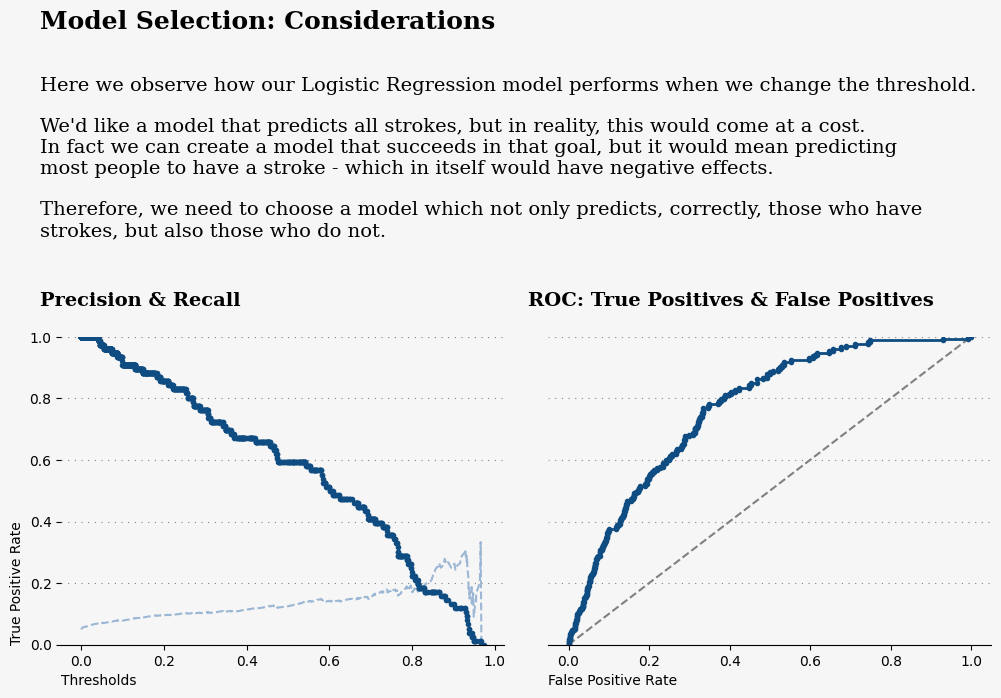

In [52]:


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logreg_pipeline.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)



y_scores = logreg_pipeline.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)



# Plots

fig = plt.figure(figsize=(12,4))
gs = fig.add_gridspec(1,2, wspace=0.1,hspace=0)
ax = gs.subplots()

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color
ax[0].set_facecolor(background_color) 
ax[1].set_facecolor(background_color)

ax[0].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax[1].grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))



y_scores = logreg_pipeline.predict_proba(X_train)[:,1]


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

ax[0].plot(thresholds, precisions[:-1], 'b--', label='Precision',color='#9bb7d4')
ax[0].plot(thresholds, recalls[:-1], '.', linewidth=1,label='Recall',color='#0f4c81')
ax[0].set_ylabel('True Positive Rate',loc='bottom')
ax[0].set_xlabel('Thresholds',loc='left')
#plt.legend(loc='center left')
ax[0].set_ylim([0,1])


# plot the roc curve for the model
ax[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer',color='gray')
ax[1].plot(lr_fpr, lr_tpr, marker='.', linewidth=2,color='#0f4c81')
ax[1].set_xlabel('False Positive Rate',loc='left')
ax[1].set_ylabel('')
ax[1].set_ylim([0,1])

for s in ["top","right","left"]:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)
    
    
ax[0].text(-0.1,2,'Model Selection: Considerations',fontsize=18,fontfamily='serif',fontweight='bold')
ax[0].text(-0.1,1.26,
'''
Here we observe how our Logistic Regression model performs when we change the threshold.

We'd like a model that predicts all strokes, but in reality, this would come at a cost.
In fact we can create a model that succeeds in that goal, but it would mean predicting
most people to have a stroke - which in itself would have negative effects.

Therefore, we need to choose a model which not only predicts, correctly, those who have
strokes, but also those who do not.
''',fontsize=14,fontfamily='serif')


ax[0].text(-0.1,1.1,'Precision & Recall',fontsize=14,fontfamily='serif',fontweight='bold')
ax[1].text(-0.1,1.1,'ROC: True Positives & False Positives',fontsize=14,fontfamily='serif',fontweight='bold')

ax[1].tick_params(axis='y', colors=background_color)

plt.show()

In [53]:
import joblib

# Save the model pipeline to a file
model_filename = 'logreg_pipeline_stroke_model.pkl'
joblib.dump(logreg_pipeline, model_filename)

print(f"Model saved to {model_filename}")

Model saved to logreg_pipeline_stroke_model.pkl
